<a href="https://colab.research.google.com/github/tanushreer-7/Netflix-Data-Sentimental-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX DATA SENTIMENTAL ANALYSIS :**

**STEP-1: IMPORTING NECESSARY PACKAGES**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

**STEP-2: READING THE NETFLIX DATASET**

In [79]:
netflix=pd.read_csv('/content/netflix_reviews.csv')
netflix

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,2487372e-d1ce-49b9-83a7-ed405a2911c1,QueenyTech,"Trash, it made me change my password because I...",1,0,5.1.2 build 17106,2025-03-01 14:50:57,5.1.2 build 17106
1,7f278d2c-00fe-4295-9f5b-43ccdb370e79,Paresh Dalbehera (PD),I love Netflix only ❤️,5,0,9.4.1 build 4 62196,2025-03-01 14:46:52,9.4.1 build 4 62196
2,42664618-3fe5-4128-af69-5012e69f4a54,Reta Ali,it's the best but pls bring back the society s...,5,0,9.3.0 build 4 62124,2025-03-01 14:28:59,9.3.0 build 4 62124
3,93b3ec35-7931-4441-9920-35547c6f1584,Jogre,"When you fold your Galaxy Fold 6, it forces Ne...",2,0,9.4.1 build 4 62196,2025-03-01 14:21:10,9.4.1 build 4 62196
4,96cbd996-c5d5-4e23-b011-6799254ac039,Auralia Rorke,Good,4,0,9.4.1 build 4 62196,2025-03-01 14:12:16,9.4.1 build 4 62196
...,...,...,...,...,...,...,...,...
130421,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
130422,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
130423,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
130424,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


**STEP-3: PRE-PROCESSING NETFLIX DATASET**

In [80]:
#check for missing values
netflix.isnull().sum()

,0
reviewId,0
userName,2
content,5
score,0
thumbsUpCount,0
reviewCreatedVersion,21269
at,0
appVersion,21269


In [81]:
#delete/remove unwanted columns
netflix=netflix.drop(['reviewCreatedVersion','appVersion'],axis=1)
netflix

,reviewId,userName,content,score,thumbsUpCount,at
0,2487372e-d1ce-49b9-83a7-ed405a2911c1,QueenyTech,"Trash, it made me change my password because I...",1,0,2025-03-01 14:50:57
1,7f278d2c-00fe-4295-9f5b-43ccdb370e79,Paresh Dalbehera (PD),I love Netflix only ❤️,5,0,2025-03-01 14:46:52
2,42664618-3fe5-4128-af69-5012e69f4a54,Reta Ali,it's the best but pls bring back the society s...,5,0,2025-03-01 14:28:59
3,93b3ec35-7931-4441-9920-35547c6f1584,Jogre,"When you fold your Galaxy Fold 6, it forces Ne...",2,0,2025-03-01 14:21:10
4,96cbd996-c5d5-4e23-b011-6799254ac039,Auralia Rorke,Good,4,0,2025-03-01 14:12:16
...,...,...,...,...,...,...
130421,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03
130422,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30
130423,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58
130424,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42


**SETP-4: ANALYSING THE DATASET**

In [82]:
#analyze the dataset
print("Index: \n",netflix.index)
print("\nColumn: \n",netflix.columns)
print("\nSize:",netflix.size)
print("\nShape:",netflix.shape)
print("\nData types: \n",netflix.dtypes)
print("\nDimension:",netflix.ndim)
print("\nMemory Usage: \n",netflix.memory_usage())
print("\nInfo :")
print(netflix.info())
print(netflix.describe())

Index: 
 RangeIndex(start=0, stop=130426, step=1)

Column: 
 Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

Size: 782556

Shape: (130426, 6)

Data types: 
 reviewId         object
userName         object
content          object
score             int64
thumbsUpCount     int64
at               object
dtype: object

Dimension: 2

Memory Usage: 
 Index                132
reviewId         1043408
userName         1043408
content          1043408
score            1043408
thumbsUpCount    1043408
at               1043408
dtype: int64

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130426 entries, 0 to 130425
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       130426 non-null  object
 1   userName       130424 non-null  object
 2   content        130421 non-null  object
 3   score          130426 non-null  int64 
 4   thumbsUpCount  130426 non-null  int

**STEP-5: EXPLORATORY DATASET ANALYSIS OF NETFLIX DATASET**

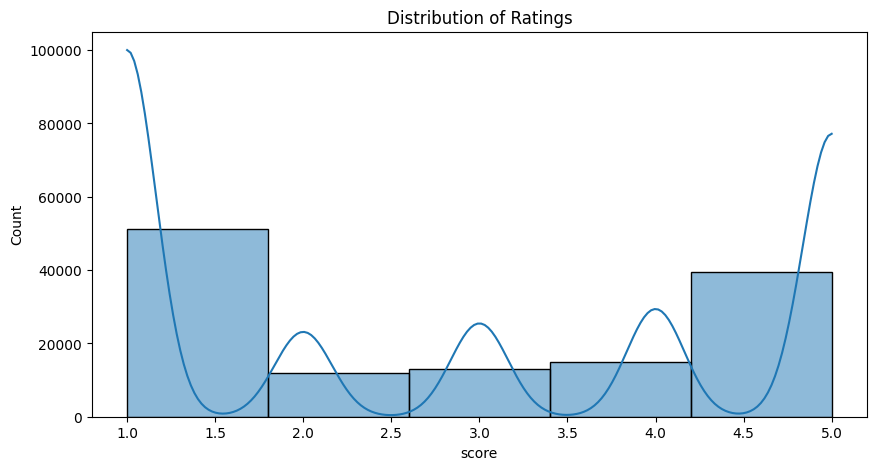

In [83]:
plt.figure(figsize=(10, 5))
sns.histplot(netflix['score'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.show()

**STEP-6: ADD A NEW COLUMN 'sentiment' TO THE EXISTING DATASET**

In [84]:
def assign_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

netflix['sentiment'] = netflix['score'].apply(assign_sentiment)

**STEP-7(A): ANALYSE THE 'sentiment' COLUMN USING BAR GRAPH**

<ipython-input-85-444a838ed61e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=netflix['sentiment'], y=netflix['score'], palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}, order=['Positive', 'Neutral', 'Negative'])


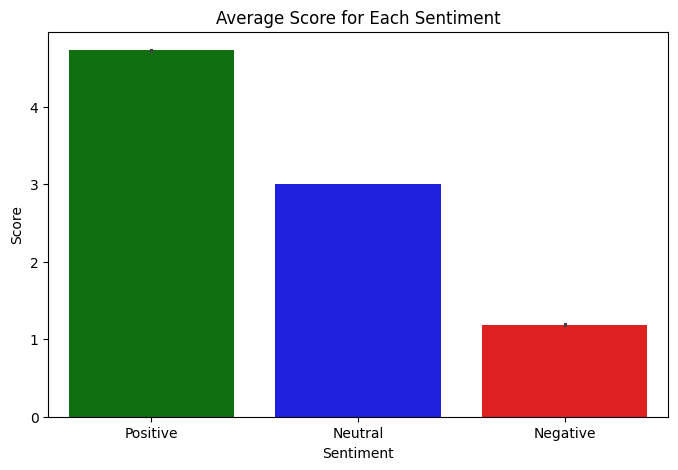

In [85]:
plt.figure(figsize=(8, 5))
sns.barplot(x=netflix['sentiment'], y=netflix['score'], palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}, order=['Positive', 'Neutral', 'Negative'])
plt.title("Average Score for Each Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Score")
plt.show()

**STEP-7(B): ANALYSE THE 'sentiment' COLUMN USING SCATTER PLOT**

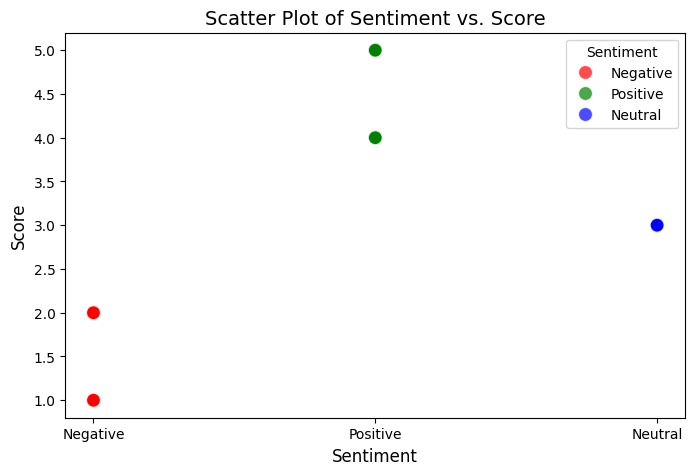

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=netflix['sentiment'], y=netflix['score'], hue=netflix['sentiment'], palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}, s=100, alpha=0.7)
plt.title("Scatter Plot of Sentiment vs. Score", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Sentiment", loc="upper right")
plt.show()

**STEP-8: TRAIN AND TEST THE MODEL(USING NAIVE BAYES)**

In [87]:
label_encoder = LabelEncoder()
netflix['sentiment_encoded'] = label_encoder.fit_transform(netflix['sentiment'])

X = netflix[['score']]
y = netflix['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**STEP-9: CALCULATE THE ACCURACY OF THE MODEL**

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     12678
     Neutral       1.00      1.00      1.00      2555
    Positive       1.00      1.00      1.00     10853

    accuracy                           1.00     26086
   macro avg       1.00      1.00      1.00     26086
weighted avg       1.00      1.00      1.00     26086



**STEP-10:DISPLAY THE CONFUSION MATRIX**

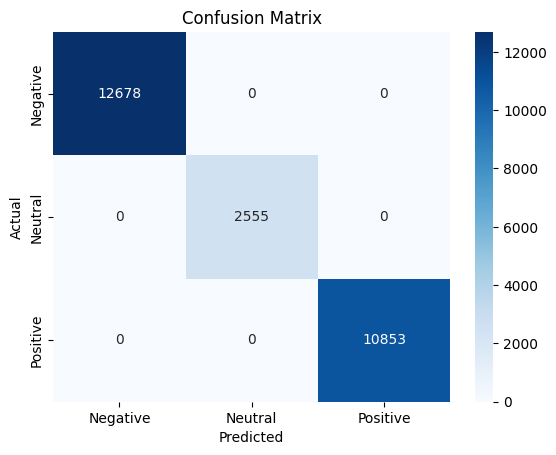

In [89]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()